<a href="https://colab.research.google.com/github/ilanmoshe52/Final_Project/blob/main/wavlets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pywt
from pywt import wavedec
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [3]:
print(pywt.Modes.modes)

['zero', 'constant', 'symmetric', 'periodic', 'smooth', 'periodization', 'reflect', 'antisymmetric', 'antireflect']


In [4]:
(a, d) = pywt.dwt([1,2,3,4,5,6], 'db2', 'smooth')
(a, d) = pywt.dwt([1,2,3,4,5,6], pywt.Wavelet('db2'), pywt.Modes.smooth)
a,d

(array([-0.51763809,  2.31078903,  5.13921616,  7.96764328]),
 array([0.00000000e+00, 1.66533454e-16, 3.33066907e-16, 2.22044605e-16]))

In [7]:
# Generate sample data for classification
import numpy as np

np.random.seed(0)
num_samples = 32
t = np.linspace(0, 1, num_samples, endpoint=False)
class_1_signal = np.sin(2 * np.pi * 5 * t)  # Class 1: Sine wave
class_2_signal = np.sin(2 * np.pi * 10 * t)  # Class 2: Higher frequency sine wave

# Combine signals with noise
noise_level = 0.5
y = class_1_signal + np.random.randn(num_samples) * noise_level

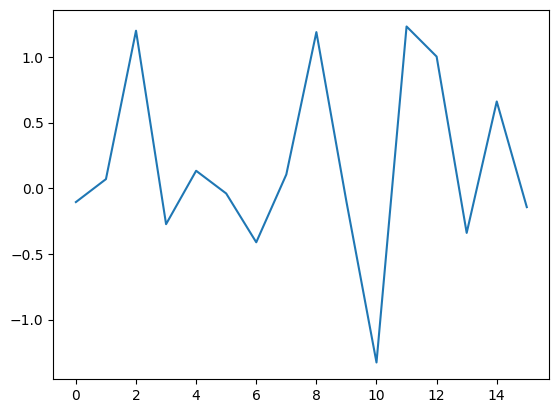

In [8]:
coeffs = wavedec(y, 'db1', level=2)
plt.plot(coeffs[2])

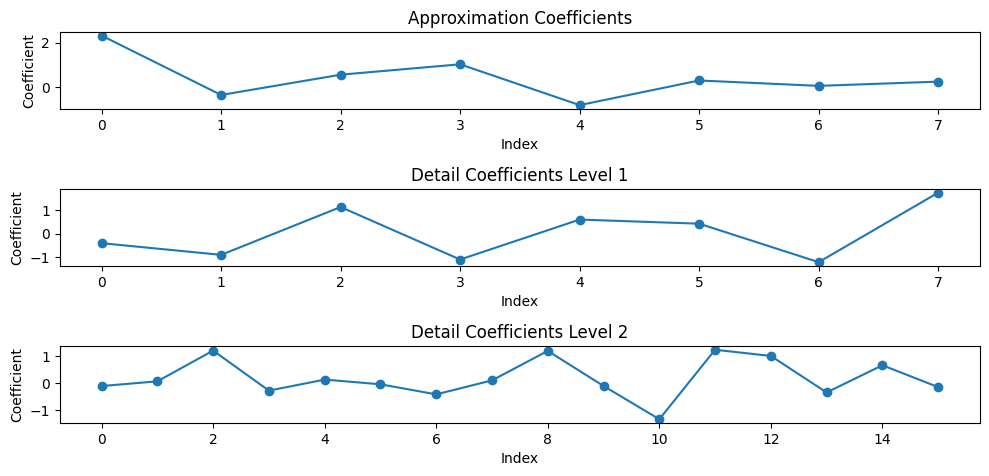

In [9]:
# Plot the coefficients
plt.figure(figsize=(10, 6))

# Plot approximation coefficients
plt.subplot(len(coeffs) + 1, 1, 1)
plt.plot(np.arange(len(coeffs[0])), coeffs[0], marker='o', linestyle='-')
plt.title('Approximation Coefficients')
plt.xlabel('Index')
plt.ylabel('Coefficient')

# Plot detail coefficients
for i in range(1, len(coeffs)):
    plt.subplot(len(coeffs) + 1, 1, i + 1)
    plt.plot(np.arange(len(coeffs[i])), coeffs[i], marker='o', linestyle='-')
    plt.title(f'Detail Coefficients Level {i}')
    plt.xlabel('Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()

In [10]:
pip install sounddevice

In [11]:
from skimage.restoration import denoise_wavelet
import pywt
import numpy as np
import matplotlib.pyplot as plt


(1024,)

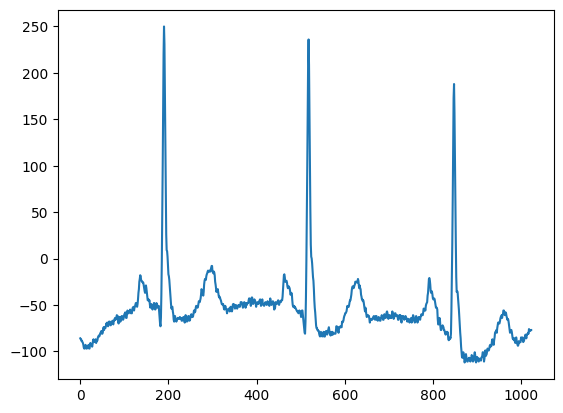

In [12]:
x = pywt.data.ecg()
plt.plot(x)
x.shape

In [13]:
noise_level = 5
noise = np.random.randn(x.shape[0]) * noise_level
y = x + noise

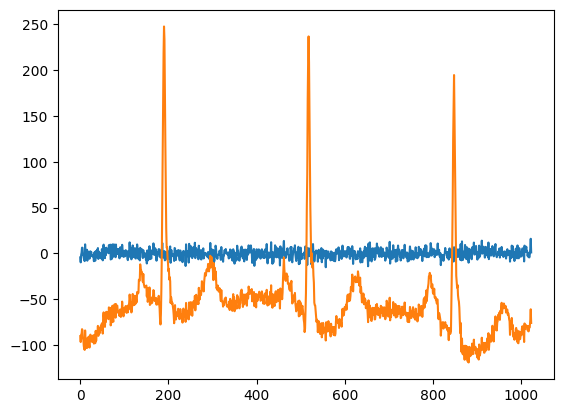

In [14]:
plt.plot(noise)
plt.plot(y)

In [15]:
y_denoise = denoise_wavelet(y,wavelet = 'sym8')

(1024,)

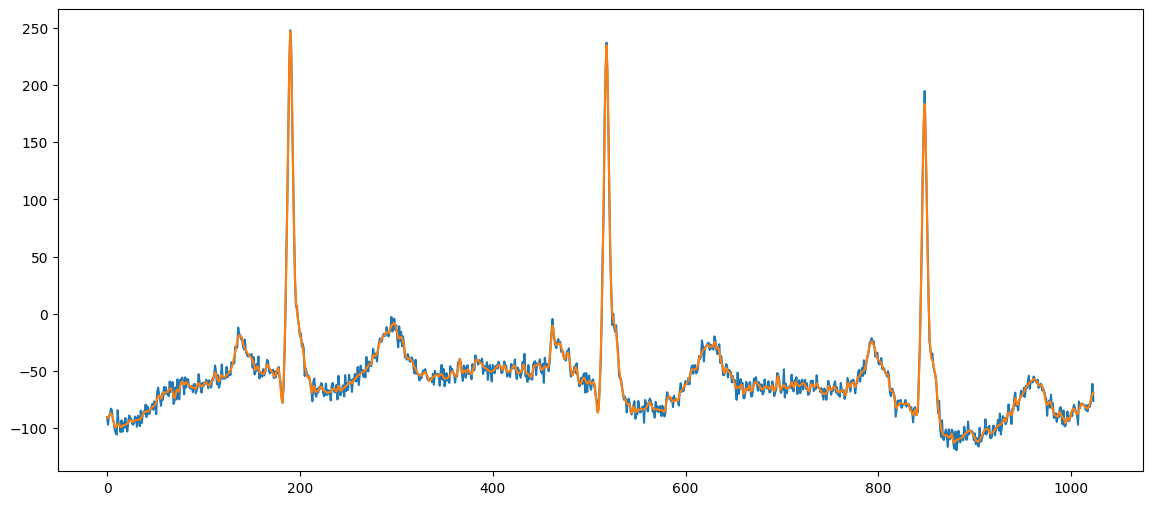

In [17]:
plt.figure(figsize=(14,6))
plt.plot(y)
plt.plot(y_denoise )
y_denoise.shape

In [25]:
level=2
coeffs = wavedec(y_denoise, 'db1', level=level)
coff = pywt.coeffs_to_array(coeffs)
print(coff)

(array([-180.03626804, -180.70739754, -196.54346165, ...,   -1.74724629,
         -2.48822613,   -0.55531091]), [(slice(None, 256, None),), {'d': (slice(256, 512, None),)}, {'d': (slice(512, 1024, None),)}])


In [36]:
len(coeffs) ,  len(coeffs[0]) , len(coeffs[1]) , len(coeffs[2]) , len(y_denoise)

(3, 256, 256, 512, 1024)

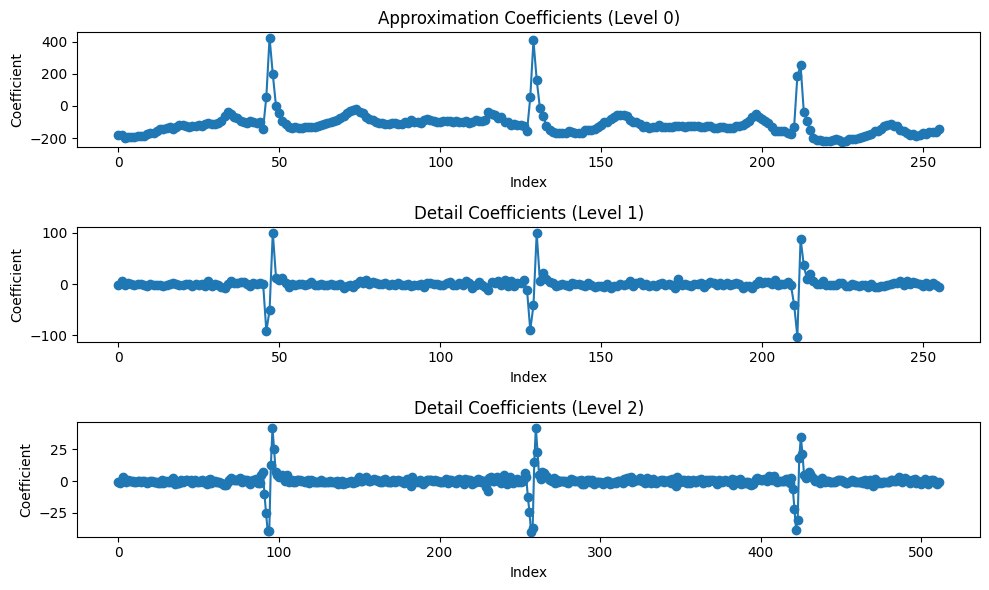

In [27]:
# Plot coefficients
plt.figure(figsize=(10, 6))

# Plot approximation coefficients
plt.subplot(level+1, 1, 1)
plt.plot(np.arange(len(coeffs[0])), coeffs[0], marker='o', linestyle='-')
plt.title('Approximation Coefficients (Level 0)')
plt.xlabel('Index')
plt.ylabel('Coefficient')

# Plot detail coefficients
for i in range(1, len(coeffs)):
    plt.subplot(level+1, 1, i+1)
    plt.plot(np.arange(len(coeffs[i])), coeffs[i], marker='o', linestyle='-')
    plt.title(f'Detail Coefficients (Level {i})')
    plt.xlabel('Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()

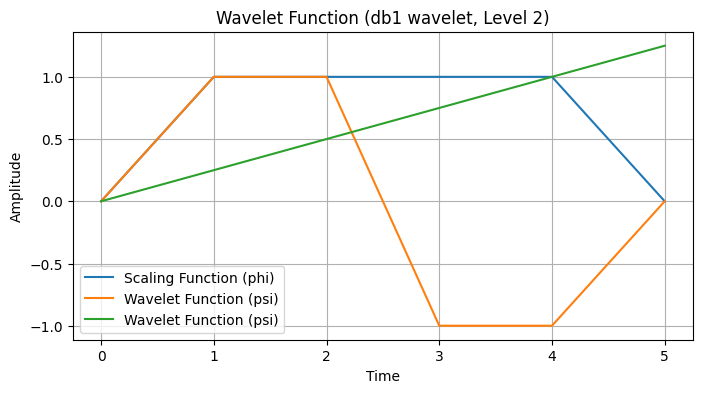

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Define wavelet type and level
wavelet_type = 'db1'  # Example: Daubechies wavelet
level = 2

# Create a Wavelet object
wavelet = pywt.Wavelet(wavelet_type)

# Plot the wavelet function
plt.figure(figsize=(8, 4))
t = np.linspace(0, level, num=1000 * level)
plt.plot(wavelet.wavefun(level=level)[0], label='Scaling Function (phi)')
plt.plot(wavelet.wavefun(level=level)[1], label='Wavelet Function (psi)')
plt.plot(wavelet.wavefun(level=level)[2], label='Wavelet Function (psi)')
plt.title(f'Wavelet Function ({wavelet_type} wavelet, Level {level})')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


###**Testing filters**

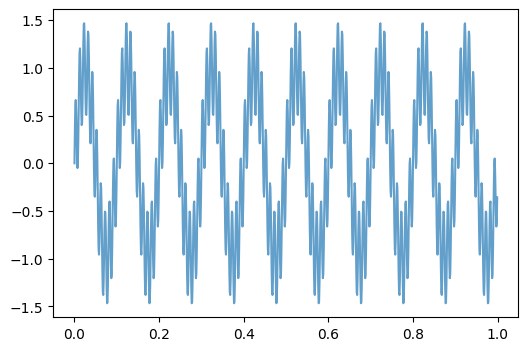

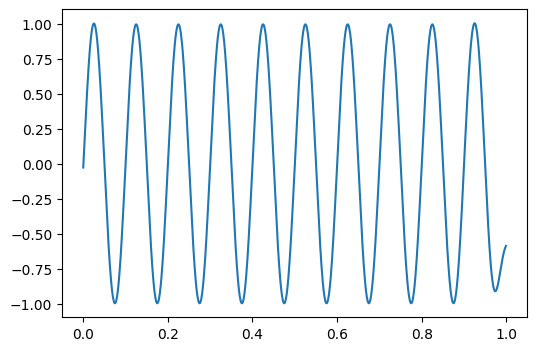

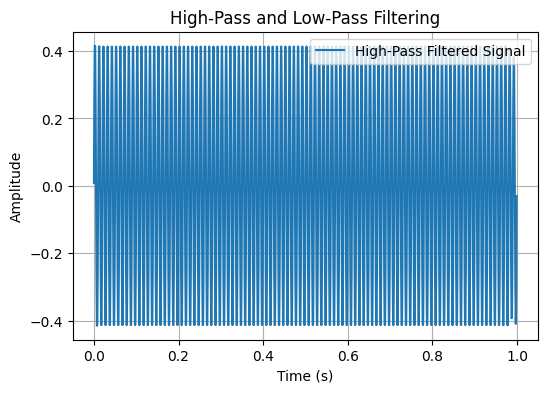

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate a test signal (e.g., a sine wave)
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
x = np.sin(2 * np.pi * 10 * t)  # 10 Hz sine wave
x += 0.5 * np.sin(2 * np.pi * 100 * t)  # 100 Hz sine wave (noise)

# Define the cutoff frequencies for high-pass and low-pass filters
low_cutoff = 20  # Low-pass filter cutoff frequency (Hz)
high_cutoff = 80  # High-pass filter cutoff frequency (Hz)

# Design low-pass and high-pass filters using Butterworth filter
order = 4  # Filter order
b_low, a_low = signal.butter(order, low_cutoff / (fs / 2), btype='low')  # Low-pass filter
b_high, a_high = signal.butter(order, high_cutoff / (fs / 2), btype='high')  # High-pass filter

# Apply low-pass filter
x_lowpass = signal.filtfilt(b_low, a_low, x)

# Apply high-pass filter
x_highpass = signal.filtfilt(b_high, a_high, x)

# Plot original and filtered signals
plt.figure(figsize=(6, 4))
plt.plot(t, x, label='Original Signal', alpha=0.7)
plt.figure(figsize=(6, 4))
plt.plot(t, x_lowpass, label='Low-Pass Filtered Signal')
plt.figure(figsize=(6, 4))
plt.plot(t, x_highpass, label='High-Pass Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('High-Pass and Low-Pass Filtering')
plt.legend()
plt.grid(True)
plt.show()


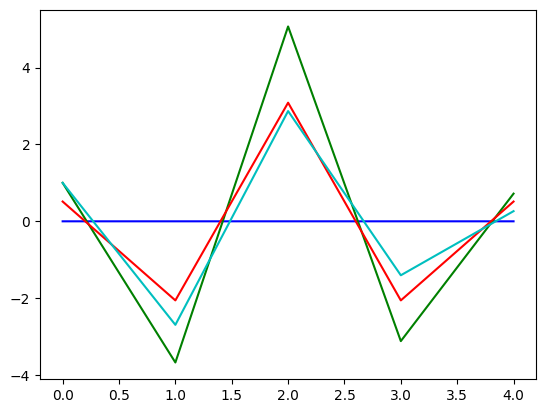

In [6]:
plt.plot(b_low , color ='b')
plt.plot(a_low , color ='g')
plt.plot(b_high, color ='r')
plt.plot(a_high, color ='c')

In [7]:
b_low

array([1.32937289e-05, 5.31749156e-05, 7.97623734e-05, 5.31749156e-05,
       1.32937289e-05])

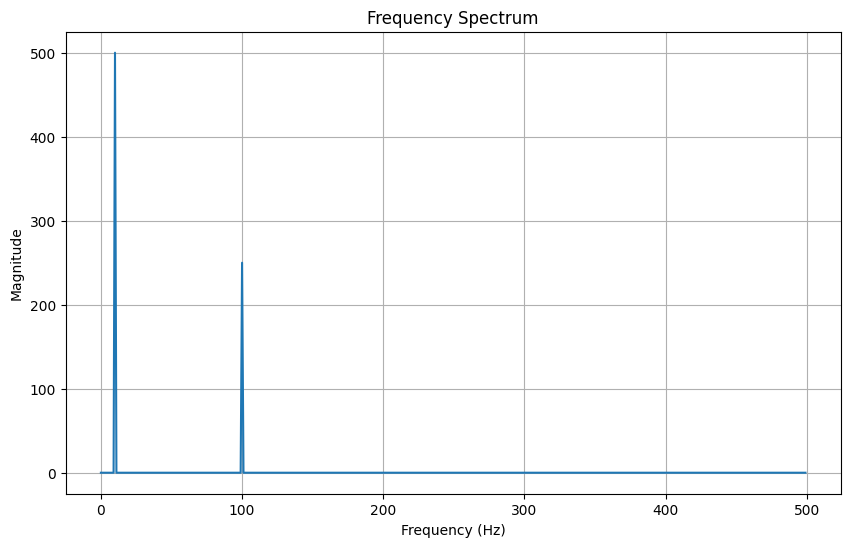

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = x #x_highpass  # x_lowpass #

# Compute the FFT
fft_result = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)  # Frequency bins

half = int(len(x)/2)
# Plot the FFT result
plt.figure(figsize=(10, 6))
plt.plot(freqs[:half], np.abs(fft_result[:half]))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


In [18]:
len(freqs) , len(x) , half

(1000, 1000, 1000)

In [15]:
half

1000